## PCA Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:
hr_employee = pd.read_csv( './Data/PCA_HR_Employee.csv', delimiter = ",")
Attrition = pd.read_csv( './Data/Attrition.csv', delimiter = ",")

In [3]:
X = hr_employee
# Y = Attrition.values.ravel()
Y = Attrition

In [4]:
y = Y.Attrition
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 29) (1176,)
(294, 29) (294,)


In [6]:
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, X_train, y_train, cv=5)
scores.mean()

0.8707500901550667

In [7]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [8]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.8903061224489796


In [9]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8129251700680272


In [10]:
# confusion matrix
pred = gb.predict(X_test)
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,228,10
1,45,11


In [11]:
# metrics
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       238
           1       0.52      0.20      0.29        56

    accuracy                           0.81       294
   macro avg       0.68      0.58      0.59       294
weighted avg       0.78      0.81      0.78       294



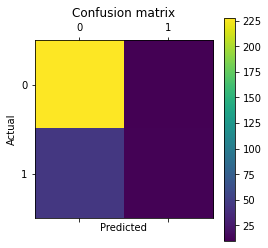

In [12]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]
scores_params = []
for m in learning_rate:
    gb = GradientBoostingClassifier(learning_rate=m)
    scores = cross_val_score(gb, X=X_train, y=y_train, scoring='accuracy', cv=5)
#     print(scores)
    scores_params.append(scores.mean())

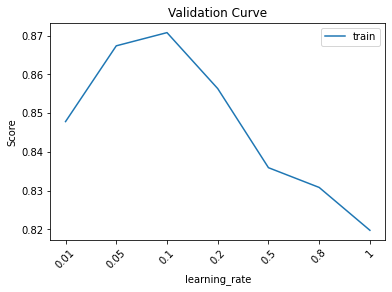

In [14]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(learning_rate)), learning_rate, rotation=45)
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [15]:
n_estimators = [50, 75, 100, 150, 200, 250, 300]

In [16]:
scores_params = []
for m in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=m)
    scores = cross_val_score(gb, X=X_train, y=y_train, scoring='accuracy', cv=5)
#     print(scores)
    scores_params.append(scores.mean())

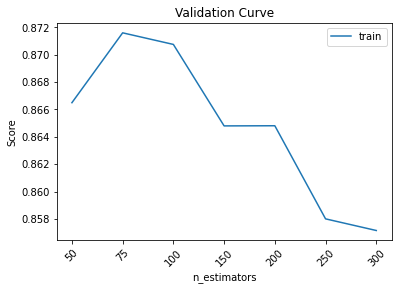

In [17]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [18]:
gb = GradientBoostingClassifier(learning_rate=0.01)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [19]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.8477891156462585


In [20]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8095238095238095


### Grid Search

In [21]:
params = dict(
    learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
    n_estimators = [25, 50, 75, 100, 150, 200]
)

params

{'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
 'n_estimators': [25, 50, 75, 100, 150, 200]}

In [22]:
gb = GradientBoostingClassifier()
gs = GridSearchCV(estimator=gb, param_grid=params, scoring='f1', cv=5, n_jobs=-1, )
gs

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
                         'n_estimators': [25, 50, 75, 100, 150, 200]},
             scoring='f1')

In [23]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
                         'n_estimators': [25, 50, 75, 100, 150, 200]},
             scoring='f1')

In [24]:
gs.best_estimator_

GradientBoostingClassifier(n_estimators=200)

In [25]:
#learning_rate = 0.8 n_estimator = 150
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [26]:
best_estimator = gs.best_estimator_
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.7959183673469388

In [27]:
# confusion matrix
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,223,15
1,45,11


In [28]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       238
           1       0.42      0.20      0.27        56

    accuracy                           0.80       294
   macro avg       0.63      0.57      0.57       294
weighted avg       0.75      0.80      0.76       294



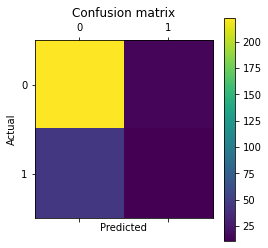

In [29]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    fig = plt.figure(figsize = (15,20))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

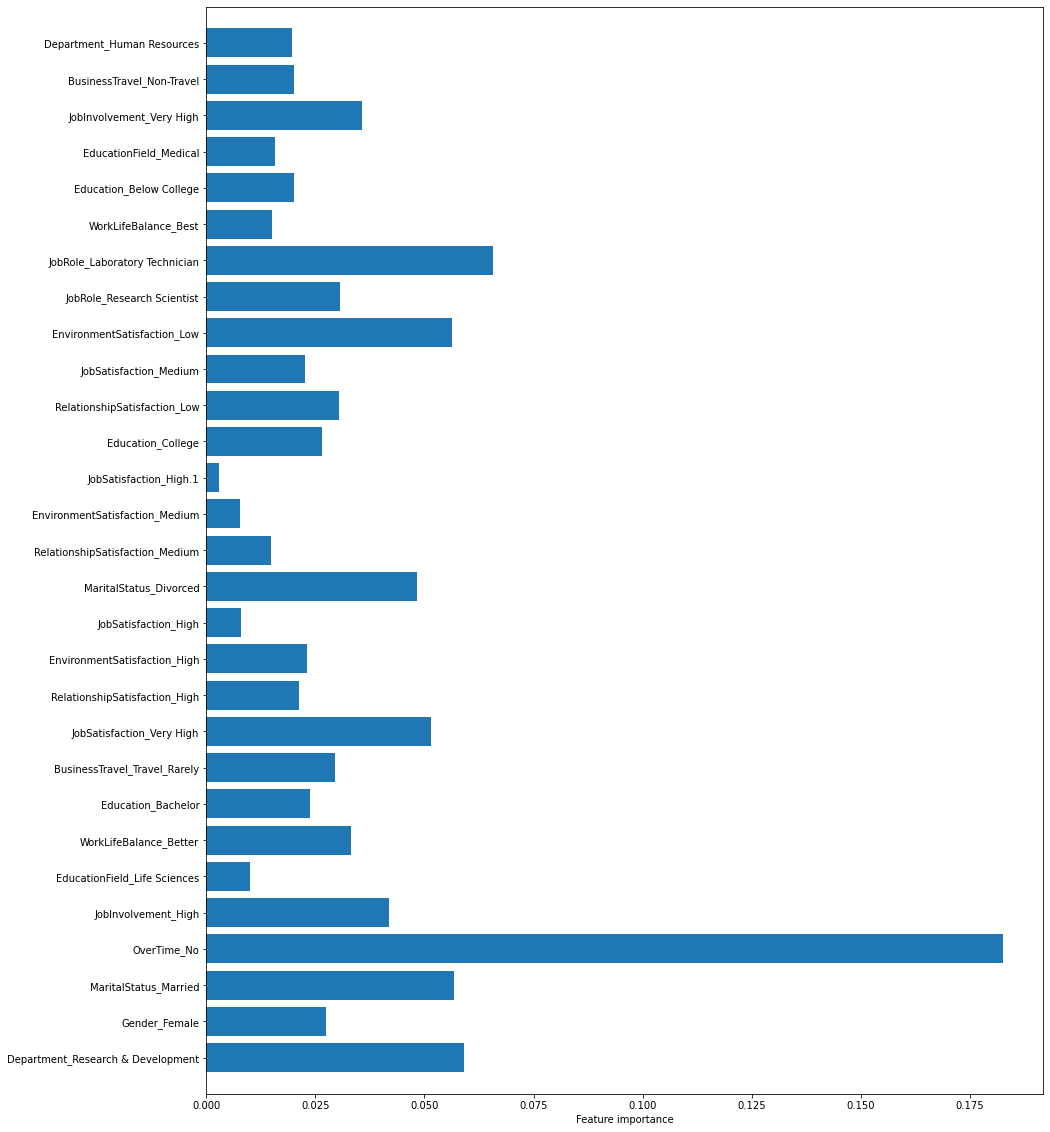

In [31]:
plot_feature_importances(best_estimator, df=X)

In [32]:
gboost = GradientBoostingClassifier(learning_rate=0.1)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8707500901550667

In [33]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 200, 250, 300],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]
}

cv = GridSearchCV(gb, parameters, cv=5, scoring='recall')
cv.fit(X_train, y_train)

print_results(cv)

In [34]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.5]
}

cv = GridSearchCV(gb, parameters, cv=5, scoring='recall')
cv.fit(X, Y.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}

0.051 (+/-0.058) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
0.11 (+/-0.083) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
0.224 (+/-0.122) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.257 (+/-0.083) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.219 (+/-0.09) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.236 (+/-0.121) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.215 (+/-0.074) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
0.194 (+/-0.074) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
0.186 (+/-0.111) for {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
0.173 (+/-0.057) for {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
0.114 (+/-0.084) for {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 100}
0.177 (+/-0.064) for {'learning_rate'

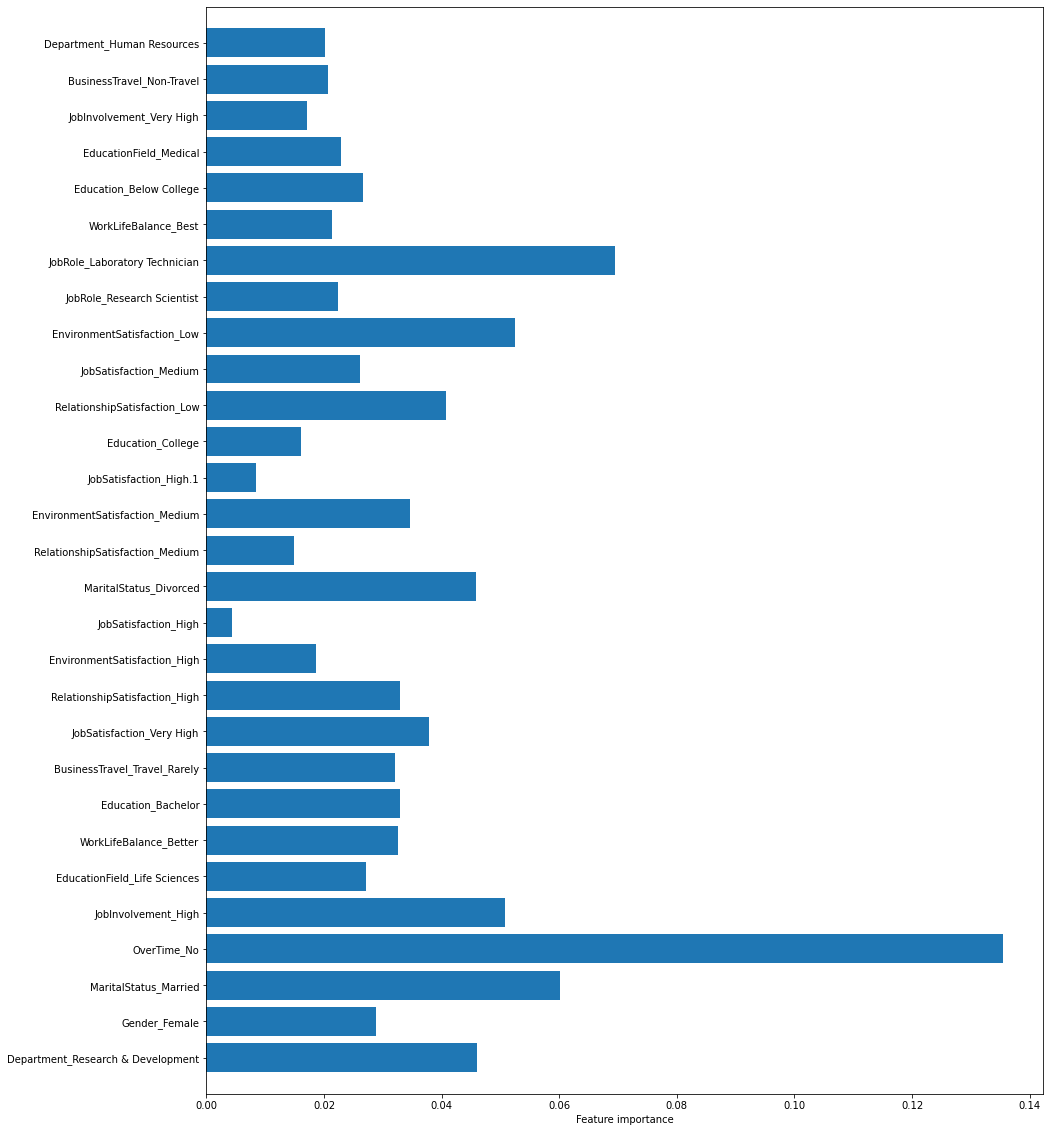

In [35]:
plot_feature_importances(cv.best_estimator_, df=X)

In [37]:
#0.735 (+/-0.207) for {'learning_rate': 100, 'max_depth': 5, 'n_estimators': 5}
#{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 500}
gboost = GradientBoostingClassifier(learning_rate=0.5, max_depth = 3, n_estimators= 500)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8290948431301839

In [38]:
gboost = GradientBoostingClassifier(learning_rate=0.1)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8707500901550667

In [39]:
#{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 100}
gboost = GradientBoostingClassifier(learning_rate=0.2, n_estimators= 200, max_depth=1)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8631013342949874

In [40]:
gb = GradientBoostingClassifier(learning_rate=0.2, n_estimators=200, max_depth=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=200)

In [41]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.8673469387755102


In [42]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8299319727891157


In [43]:
# confusion matrix
pred = gb.predict(X_test)
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,234,4
1,46,10


In [44]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       238
           1       0.71      0.18      0.29        56

    accuracy                           0.83       294
   macro avg       0.78      0.58      0.59       294
weighted avg       0.81      0.83      0.79       294



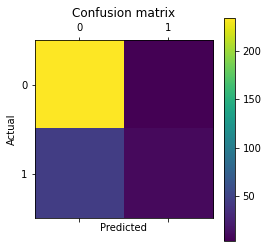

In [45]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true = y_test, y_pred = pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
print(" Recall:",recall.round(2),"\n","Precision:",precision.round(2),"\n","Specificity:",specificity.round(2),"\n","F1-score:",f1.round(2),"\n","Balanced Accuracy:", balanced_accuracy.round(2))

 Recall: 0.18 
 Precision: 0.71 
 Specificity: 0.98 
 F1-score: 0.29 
 Balanced Accuracy: 0.58
